# **Práctica 7: Data clustering**

Se carga el dataset, seleccionamos las variables numéricas relevantes y escalamos los datos

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("/content/Video_Games_Sales_Cleaned.csv")

features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Encontrar el número óptimo de clusters (método del codo)
Se busca el punto donde la curva empieza a “doblarse” (el codo).
Ese valor de k será el número ideal de clusters.

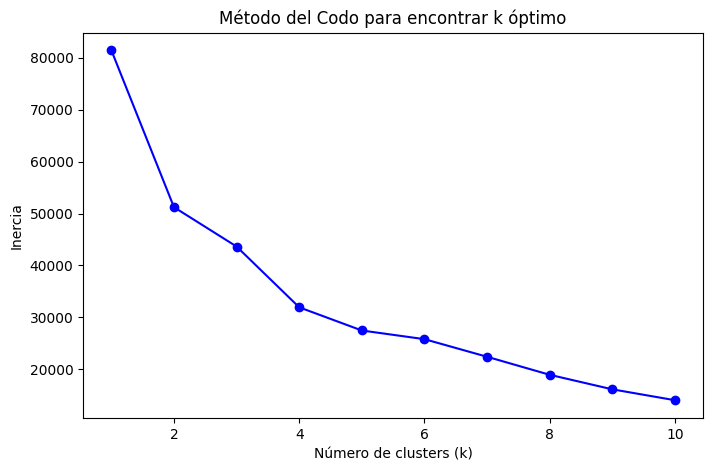

In [2]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para encontrar k óptimo')
plt.show()


La curva tiene un cambio pronunciado entre k = 1 y k = 3, y luego se vuelve más suave.

Eso indica que el número óptimo de clusters está alrededor de k = 3 o k = 4.

# Entrenar el modelo K-Means
Seleccionamos k = 3 como nuestro valor óptimo

In [3]:
k_optimo = 3

kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['Name', 'Global_Sales', 'Cluster']].head())

                       Name  Global_Sales  Cluster
0                Wii Sports         82.74        2
1         Super Mario Bros.         40.24        1
2            Mario Kart Wii         35.82        1
3         Wii Sports Resort         33.00        1
4  Pokemon Red/Pokemon Blue         31.37        1


# Visualizar los clusters
Visualizamos los clusters por medio de un gráfico comparando ventas en Norteamerica contra ventas en Europa

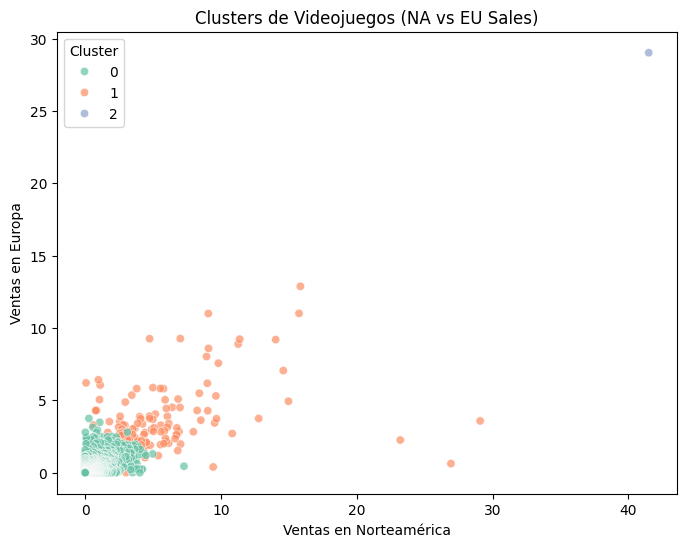

In [4]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='NA_Sales', y='EU_Sales',
    hue='Cluster', palette='Set2',
    data=df, alpha=0.7
)
plt.title('Clusters de Videojuegos (NA vs EU Sales)')
plt.xlabel('Ventas en Norteamérica')
plt.ylabel('Ventas en Europa')
plt.show()


# Analizar los clusters


In [5]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

          NA_Sales   EU_Sales  JP_Sales  Other_Sales  Global_Sales
Cluster                                                           
0         0.218085   0.116962  0.064173     0.038545      0.438047
1         5.384014   3.443380  1.719930     1.112817     11.659507
2        41.490000  29.020000  3.770000     8.460000     82.740000


Esto nos muestra la media de ventas por región en cada grupo encontrado por el algoritmo.

# Entrenar el modelo K-means
Ahora seleccionamos k = 4

In [6]:
k_optimo = 4

kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df[['Name', 'Global_Sales', 'Cluster']].head())

                       Name  Global_Sales  Cluster
0                Wii Sports         82.74        2
1         Super Mario Bros.         40.24        3
2            Mario Kart Wii         35.82        3
3         Wii Sports Resort         33.00        3
4  Pokemon Red/Pokemon Blue         31.37        3


# Visualizar los clusters

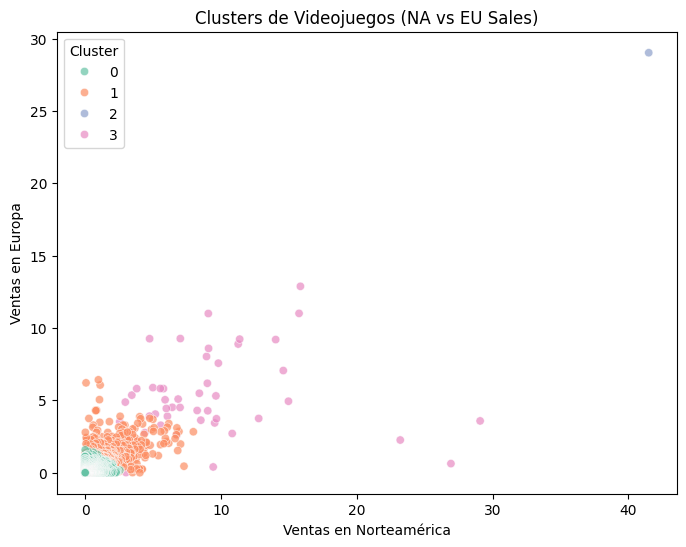

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='NA_Sales', y='EU_Sales',
    hue='Cluster', palette='Set2',
    data=df, alpha=0.7
)
plt.title('Clusters de Videojuegos (NA vs EU Sales)')
plt.xlabel('Ventas en Norteamérica')
plt.ylabel('Ventas en Europa')
plt.show()


# Analizar los clusters

In [8]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

          NA_Sales   EU_Sales  JP_Sales  Other_Sales  Global_Sales
Cluster                                                           
0         0.169267   0.083915  0.051036     0.027315      0.331827
1         1.899204   1.280047  0.550593     0.419236      4.148892
2        41.490000  29.020000  3.770000     8.460000     82.740000
3         9.297609   5.387609  2.853478     1.859130     19.397609


# Interpretación de los datos
Ambos valores (k=3 o k=4) son razonables, con k=3 es más general y fácil de interpretar, mientras que con k=4 captura mejor los diferentes niveles de éxito comercial.